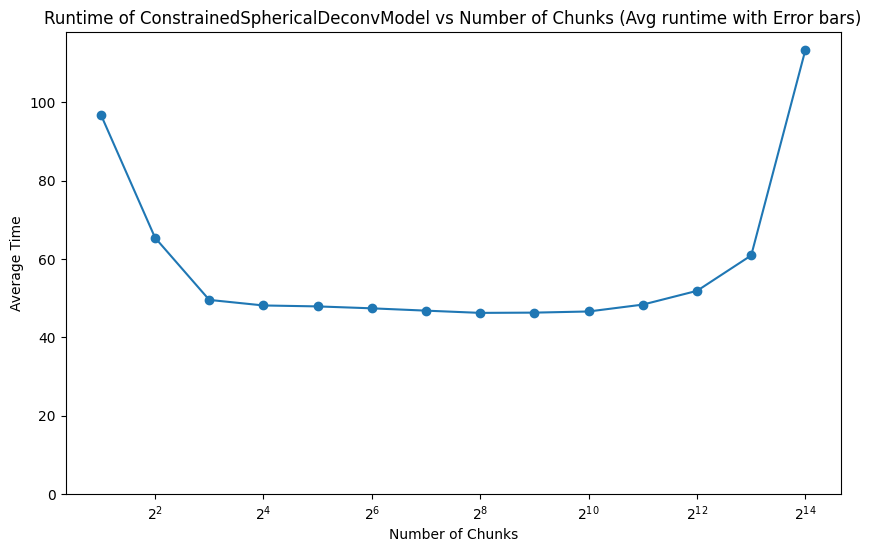

KeyError: 'num_chunks'

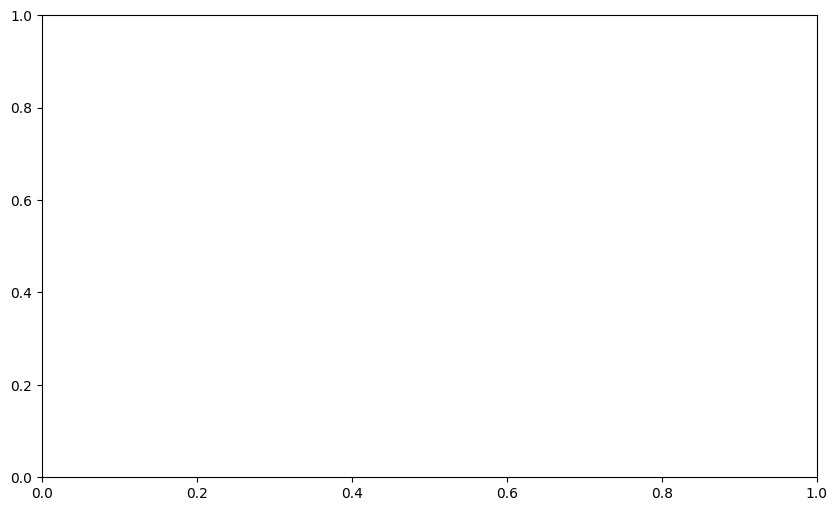

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('feb19.csv')

# add chunks per core
df['chunks_per_core'] = df['num_chunks'] / df['cpu_count']

# Get unique engine types
model_types = df['model'].unique()

# For each engine type, plot a graph
for model in model_types:
    model_df = df[(df['model'] == model) & (df['engine'] == 'ray')]

    # Group by 'num_chunks' and calculate the mean and std of 'time'
    grouped_df = model_df.groupby('num_chunks')['time'].agg(["mean","std"]).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(grouped_df['num_chunks'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue')
    ax.set_ylim(bottom=0)

    # Set x-axis to logarithmic scale with base 2
    ax.set_xscale('log', base=2)

    ax.set_title(f'Runtime of {model} vs Number of Chunks (Avg runtime with Error bars)')
    ax.set_xlabel('Number of Chunks')
    ax.set_ylabel('Average Time')
    plt.show()

    grouped_df = model_df.groupby('vox_per_chunk')['time'].agg(["mean","std"]).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(grouped_df['vox_per_chunk'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue')
    ax.set_ylim(bottom=0)

    # Set x-axis to logarithmic scale with base 2
    ax.set_xscale('log', base=2)

    ax.set_title(f'Runtime of {model} vs Voxels per Chunk (Avg runtime with Error bars)')
    ax.set_xlabel('Voxels per Chunk')
    ax.set_ylabel('Average Time')
    plt.show()

    # Group by 'num_chunks' and calculate the mean and std of 'time'
    grouped_df = model_df.groupby('num_chunks')['avg_mem'].agg(["mean","std"]).reset_index()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(grouped_df['num_chunks'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue')
    ax.set_ylim(bottom=0)

    # Set x-axis to logarithmic scale with base 2
    ax.set_xscale('log', base=2)

    ax.set_title(f'Memory useage of {model} vs Number of Chunks (Avg memory useage with Error Bars)')
    ax.set_xlabel('Number of Chunks')
    ax.set_ylabel('Memory useage (Gb)')
    plt.show()



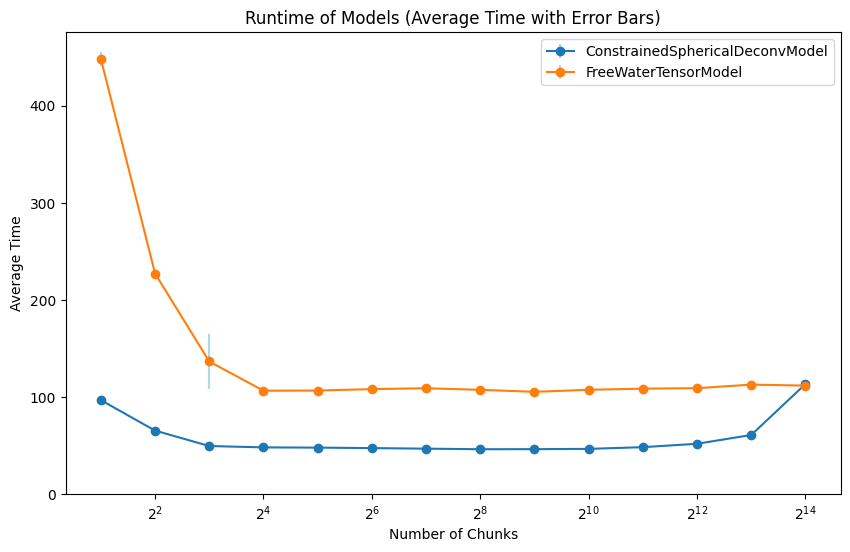

In [11]:

fig, ax = plt.subplots(figsize=(10, 6))

# For each engine type, plot a graph
for model in model_types:
    model_df = df[(df['model'] == model) & (df['engine'] == 'ray')]

    # Group by 'num_chunks' and calculate the mean and std of 'time'
    grouped_df = model_df.groupby('num_chunks')['time'].agg(["mean", "std"]).reset_index()

    ax.errorbar(grouped_df['num_chunks'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue', label=model)

# Set x-axis to logarithmic scale with base 2
ax.set_xscale('log', base=2)

ax.set_ylim(bottom=0)
ax.set_title('Runtime of Models (Average Time with Error Bars)')
ax.set_xlabel('Number of Chunks')
ax.set_ylabel('Average Time')

# Add a legend
ax.legend()

plt.show()